# Earthquake Prediction Using Python



In [68]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time

In [69]:

df = pd.read_csv("earthquake.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [71]:
df.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [72]:
df.shape

(24007, 17)

In [73]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [74]:
df.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

# Data Preprocessing

In [75]:
df = df.drop('id',axis=1)

In [76]:
import datetime
import time

timestamp = []
for d, t in zip(df['date'], df['time']):
  ts = datetime.datetime.strptime(d+' '+t, '%Y.%m.%d %I:%M:%S %p')
  timestamp.append(time.mktime(ts.timetuple()))
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values
final_data = df.drop(['date', 'time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError'] 
df = final_data
df.head()

OverflowError: mktime argument out of range

In [77]:
df.dtypes

date          object
time          object
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

# Data Encoding

In [87]:

label_encoder = preprocessing.LabelEncoder() 
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])


In [88]:
df.isnull().sum()

date         0
time         0
lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
dtype: int64

# Data Visualization

In [89]:
import plotly.express as px
px.scatter(df, x='richter',y='xm', color="direction")

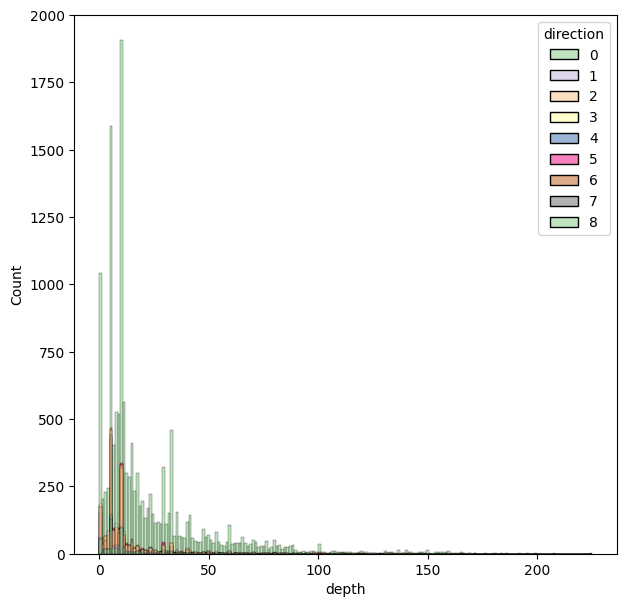

In [90]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='direction',palette = 'Accent')
plt.show()

<Figure size 700x700 with 0 Axes>

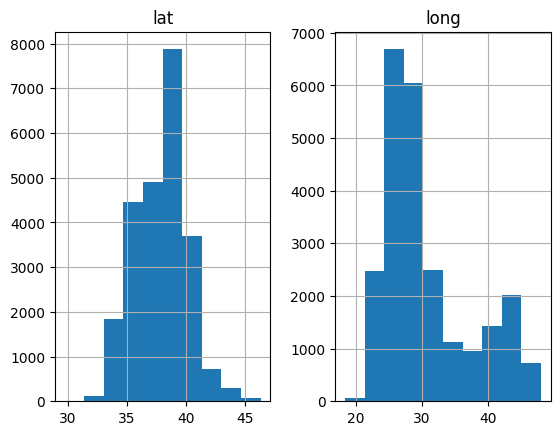

In [91]:
plt.figure(figsize=(7,7))
df[['lat','long']].hist()
plt.show()

<Axes: ylabel='count'>

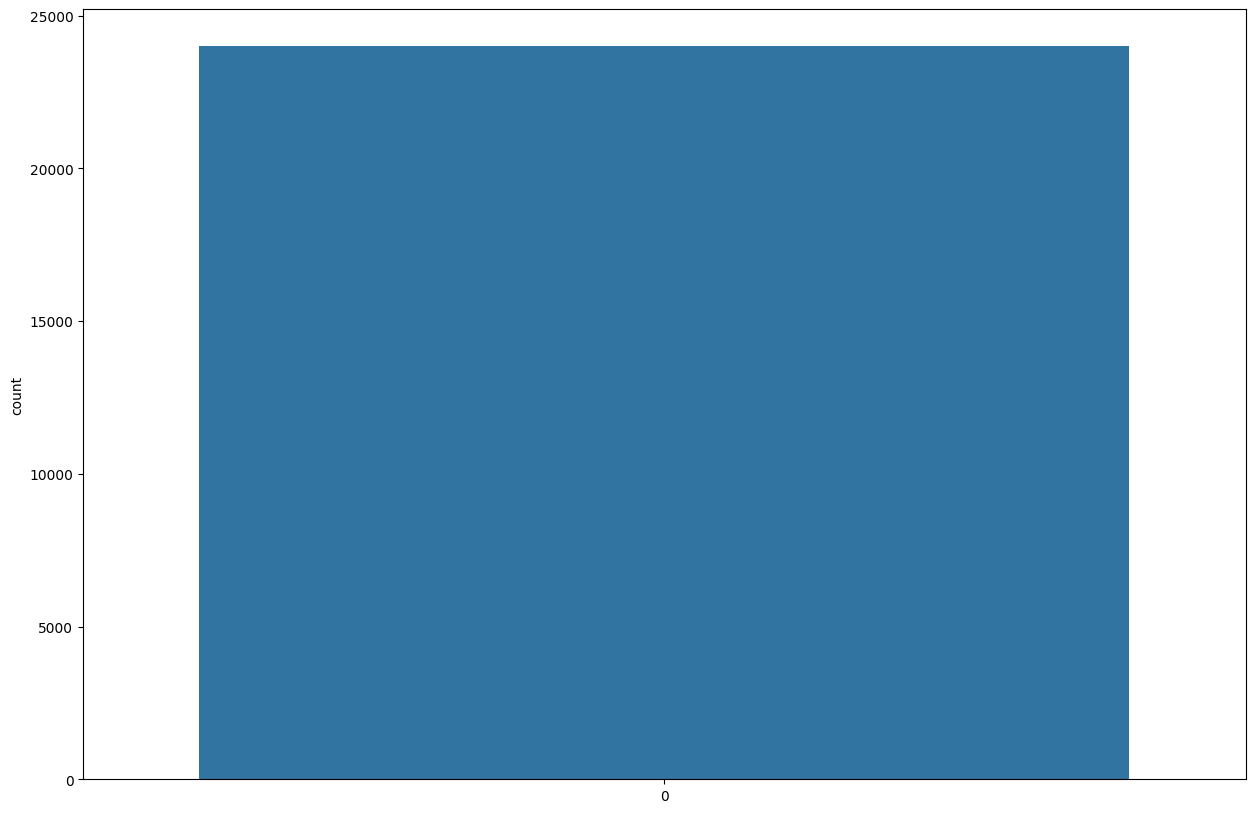

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(df.xm)

C:\Users\shubh\AppData\Local\Temp\ipykernel_14108\3879995472.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='xm', ylabel='Density'>

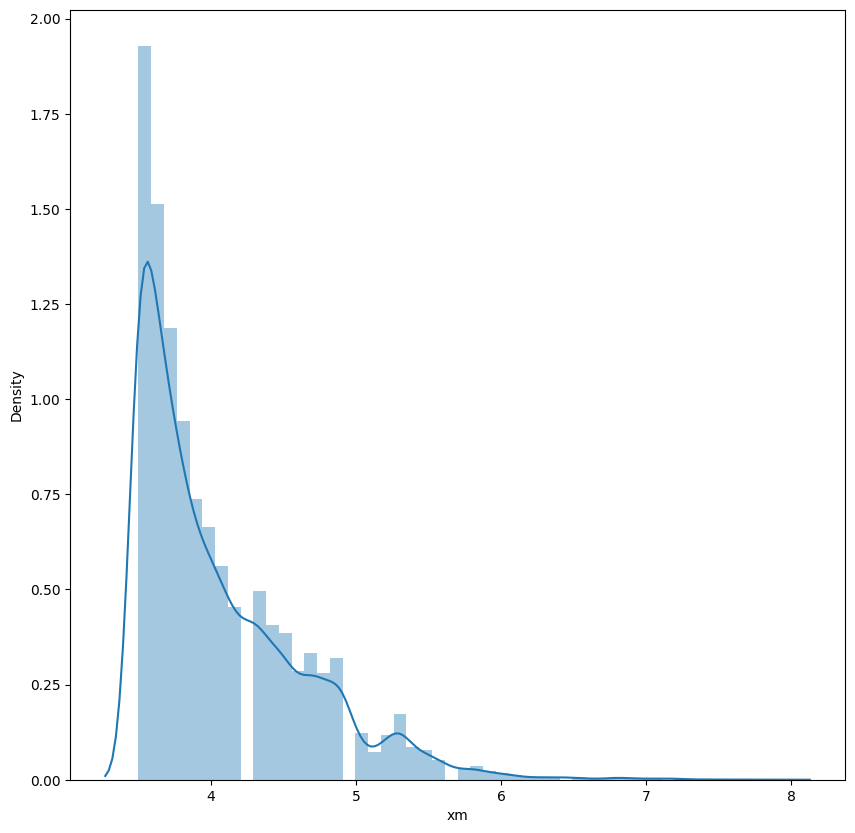

In [93]:
plt.figure(figsize=(10,10))
sns.distplot(df.xm)

Text(0, 0.5, 'ms')

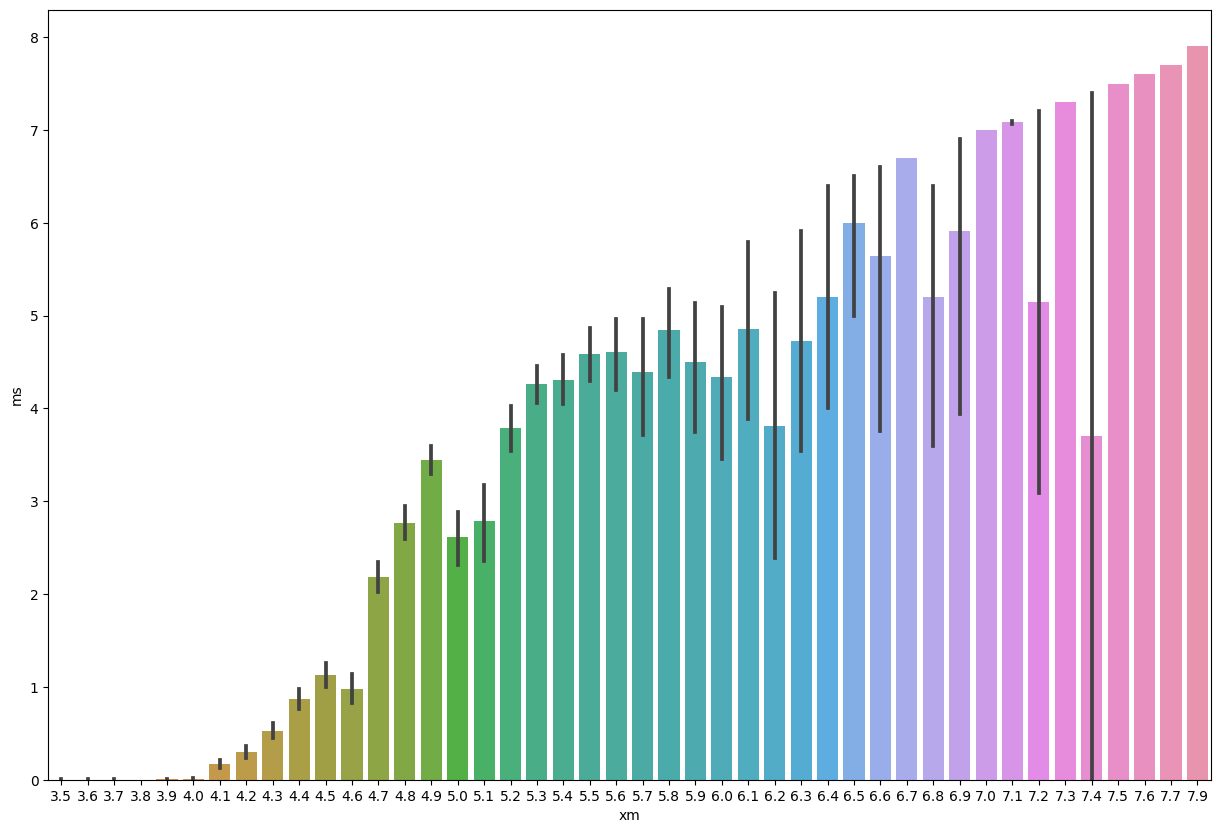

In [94]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['xm'], y=df['ms'])
plt.xlabel('xm')
plt.ylabel('ms')

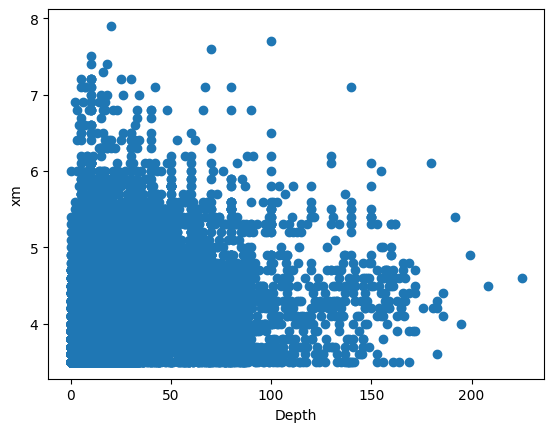

In [95]:
plt.scatter(df.depth, df.xm)
plt.xlabel("Depth")
plt.ylabel("xm")
plt.show()

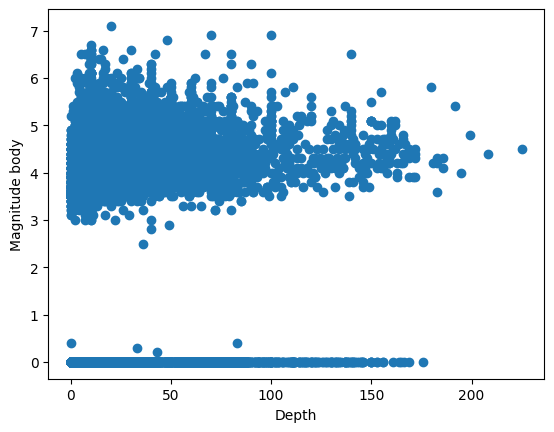

In [96]:
plt.scatter(df.depth, df.mb)
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

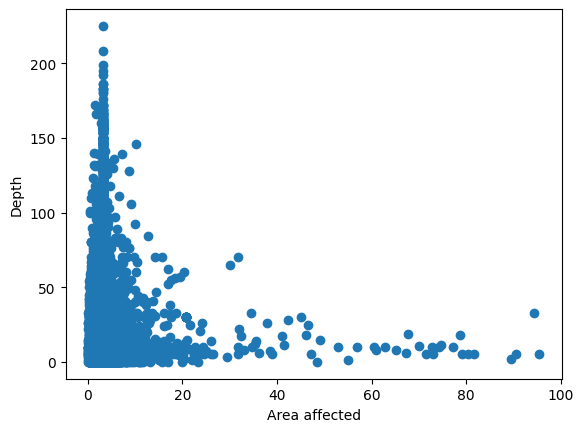

In [97]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("Depth")
plt.show()

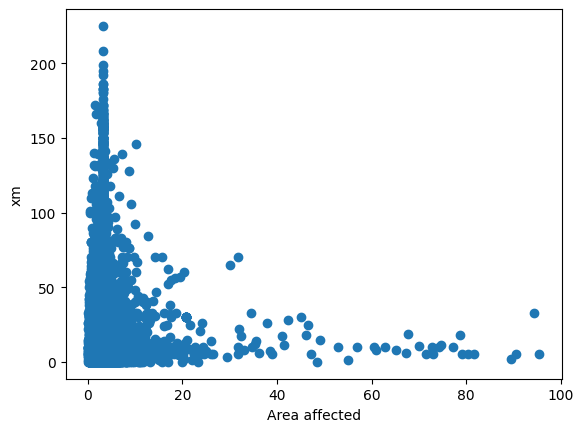

In [24]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("xm")
plt.show()

# Correlation between Attributes

In [98]:
most_correlated = df.corr()['xm'].sort_values(ascending=False)
most_correlated

xm           1.000000
ms           0.699579
mb           0.628382
richter      0.426653
mw           0.420695
depth        0.302926
md           0.241432
area         0.125275
city         0.107436
direction    0.087696
long         0.071856
dist         0.002853
lat         -0.010347
time        -0.011637
country     -0.056115
date        -0.453112
Name: xm, dtype: float64

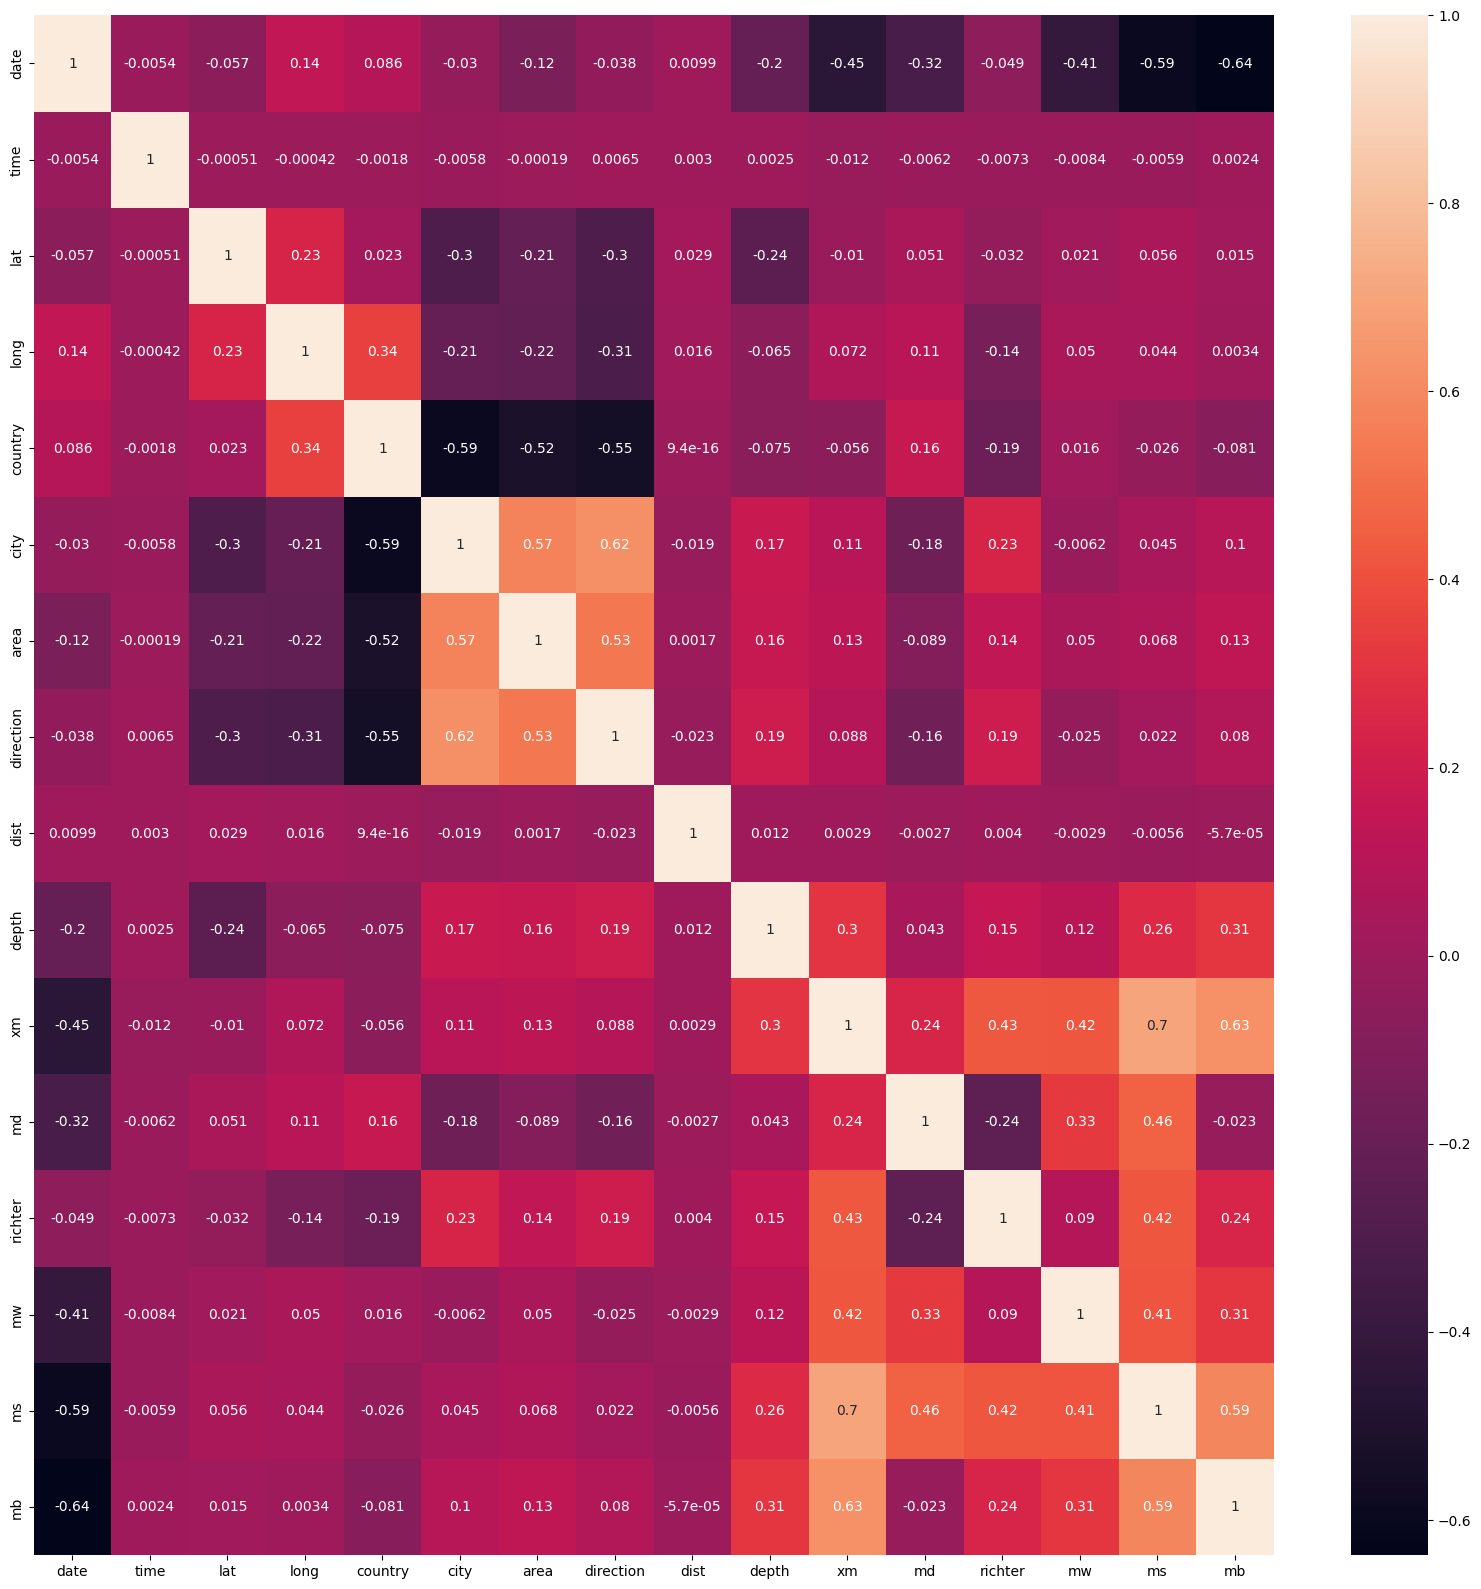

In [99]:
plt.figure(figsize=(20,20))
dataplot=sns.heatmap(df.corr(),annot=True)
plt.show()

# Normalization of data Using MinMaxScaler

In [100]:

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.head()

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,0.701482,0.295575,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.0,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000
1,0.784562,0.052324,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.0,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000
2,0.270197,0.693849,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.0,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127
3,0.596464,0.529084,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.0,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
4,0.647786,0.961035,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.0,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000


# Splitting the Dataset

In [101]:
y=np.array(df['xm']) 
X=np.array(df.drop('xm',axis=1))
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) 

# Creating Models

# 1. Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression 
start1 = time.time() 
linear=LinearRegression() 
linear.fit(X_train,y_train) 
ans1 = linear.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [103]:
accuracy1=linear.score(X_test,y_test) 
print("Accuracy of Linear Regression model is:",accuracy1)

Accuracy of Linear Regression model is: 0.6330209611884638


In [104]:
from sklearn import metrics
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.05863818231092467
Mean Squared Error: 0.006229758380093362
Root Mean Squared Error: 0.07892881843847253


Text(0, 0.5, 'Predicted Magnitude')

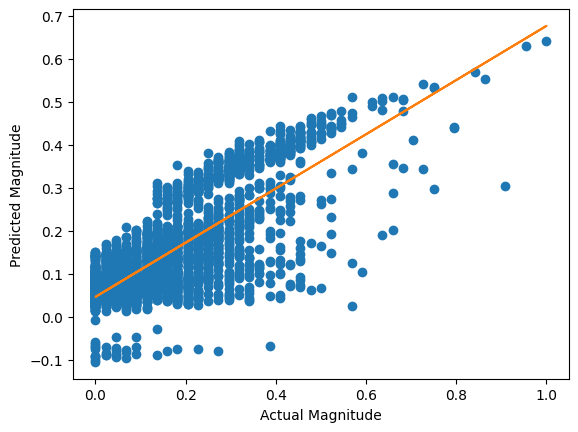

In [105]:
plt.plot(y_test, ans1, 'o') 
m, b = np.polyfit(y_test,ans1, 1) 
plt.plot(y_test, m*y_test + b) 
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

# 2. Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor
start2 = time.time() 
regressor = DecisionTreeRegressor(random_state = 40) 
regressor.fit(X_train,y_train)
ans2 = regressor.predict(X_test)
end2 = time.time()
t2 = end2-start2

In [107]:
accuracy2=regressor.score(X_test,y_test) 
print("Accuracy of Decision Tree model is:",accuracy2)

Accuracy of Decision Tree model is: 0.9939487385311384


In [108]:
print("Decision Tree")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans2)))

Decision Tree
Mean Absolute Error: 0.0007146643444022029
Mean Squared Error: 0.00010272493210473595
Root Mean Squared Error: 0.010135330882844228


# 3. KNN Model


In [109]:
from sklearn.neighbors import KNeighborsRegressor
start3 = time.time() 
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans3 = knn.predict(X_test)
end3 = time.time()
t3 = end3-start3

In [110]:
accuracy3=knn.score(X_test,y_test) 
print("Accuracy of KNN model is:",accuracy3)

Accuracy of KNN model is: 0.780036997629074


In [111]:
print("KNN Model")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans3)))

KNN Model
Mean Absolute Error: 0.04241682758446607
Mean Squared Error: 0.0037340453061530453
Root Mean Squared Error: 0.06110683518357865


In [112]:
import random
info = {}
for i in range(10):
  k = random.randint(2,10) 
  startk = time.time()
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  ans3 = knn.predict(X_test)
  endk = time.time()
  tk = endk-startk
  acc3=knn.score(X_test,y_test) 
  info[k] = [acc3,tk]

for i in info:
  print("for k =",i,": accuracy =",info[i][0])

for k = 9 : accuracy = 0.7685817848308306
for k = 4 : accuracy = 0.7827121902720415
for k = 2 : accuracy = 0.771697943938797
for k = 6 : accuracy = 0.780036997629074
for k = 3 : accuracy = 0.7781387179623587
for k = 8 : accuracy = 0.7719866461384567


Text(0.5, 1.0, 'Accuracy for different values of k')

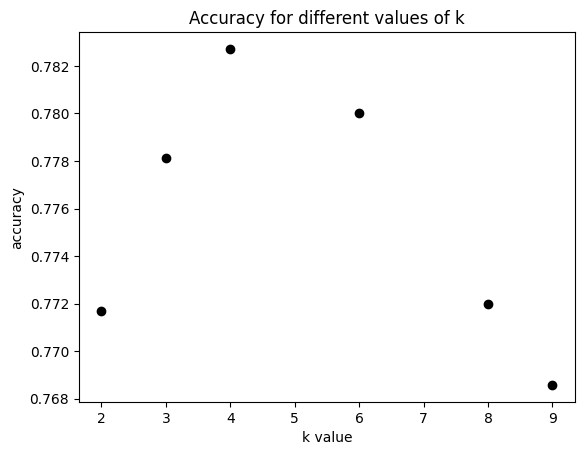

In [113]:
x = list(info.keys())
yacc = []
for i in info:
  yacc.append(info[i][0])
plt.plot(x, yacc, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("accuracy");
plt.title("Accuracy for different values of k")

Text(0.5, 1.0, 'Execution time for different values of k')

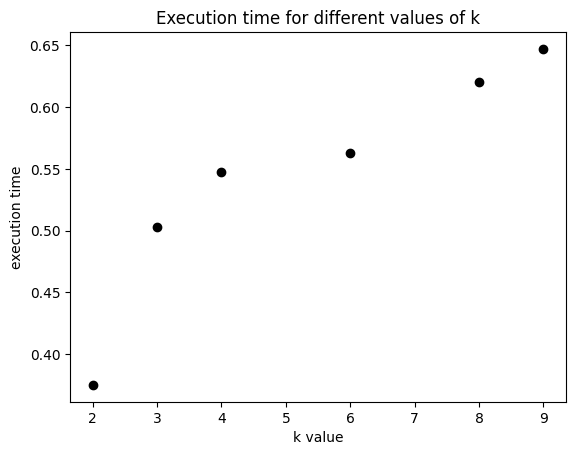

In [114]:
yt = []
for i in info:
  yt.append(info[i][1])
plt.plot(x, yt, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("execution time");
plt.title("Execution time for different values of k")

# Comparison Graphs Between This Three

# 1. Accuracy

In [115]:
models = ["linear regression","decision tree","knn"]
accuracies = [accuracy1,accuracy2,accuracy3]

Text(0.5, 1.0, 'Accuracy Comparison Graph')

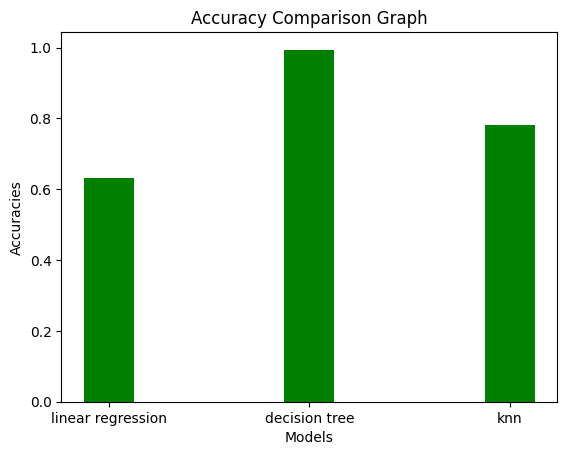

In [117]:
plt.bar(models, accuracies, color ='green',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparison Graph")

2. Execution Time

Text(0.5, 1.0, 'Execution Time Comparison Graph')

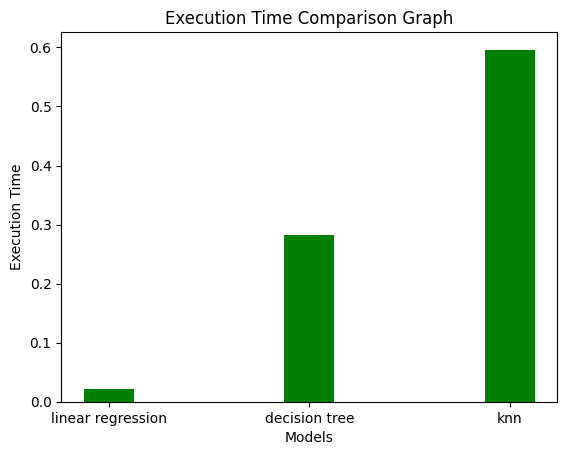

In [118]:
times = [t1,t2,t3]
plt.bar(models, times, color ='green',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Execution Time")
plt.title("Execution Time Comparison Graph")